### Deep Learning - LOAN

In [13]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt

In [ ]:
# not.fully.paid 데이터 숫자 맞추기
from sklearn.utils import shuffle 
from sklearn.utils import resample 


In [3]:
from sklearn.model_selection import train_test_split


ImportError: cannot import name '_approximate_mode' from 'sklearn.utils' (c:\AI_project\.venv\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# data load
data = pd.read_csv('dataset/loan_data.csv')

In [8]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
# one-hot encoding
data = pd.get_dummies(data, columns=['purpose'], prefix='purpose')

In [11]:
data.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

In [6]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [9]:
data.shape

(9578, 20)

##### not.fully.paid 숫자 맞추기
> 클래스 불균형 해결

In [10]:
# Checking the distribution of Target
data["not.fully.paid"].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

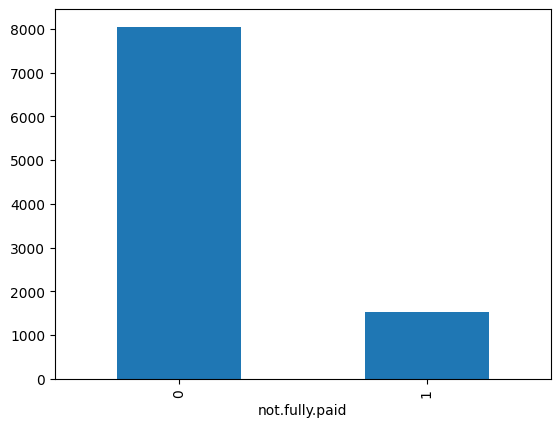

In [14]:
# Checking the distribution of Target by graph
data["not.fully.paid"].value_counts().plot(kind = "bar")
plt.show()

In [16]:
# not.fully.paid 0과 1로 나눠서 데이터 불균형 맞추기
not_fully_paid_0 = data[data['not.fully.paid'] == 0]
not_fully_paid_1 = data[data['not.fully.paid'] == 1]

In [17]:
# shape확인
print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 20)
not_fully_paid_1 (1533, 20)


In [21]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_minority_upsampled])

In [12]:
X = data.drop("not.fully.paid", axis = 1)
y = data["not.fully.paid"]

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [19]:
X_train_s.shape

(7662, 19)

In [30]:
# Sequential 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(19,)),  # 입력 크기 지정
    Dense(32, activation='relu'),
    Dense(1)  # 출력층
])

c:\AI_project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    batch_size=32,
    epochs=10,
    verbose=1,
)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1937 - val_loss: 0.1324
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254 - val_loss: 0.1323
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1274 - val_loss: 0.1314
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1232 - val_loss: 0.1295
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1221 - val_loss: 0.1282
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1225 - val_loss: 0.1297
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171 - val_loss: 0.1308
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1194 - val_loss: 0.1296
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1197 - val_loss: 0.1309
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1214 - val_loss: 0.1314


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
predictions =(model.predict(X_test_s)>0.5).astype("int32")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.8376826722338204

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.39      0.02      0.04       307

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



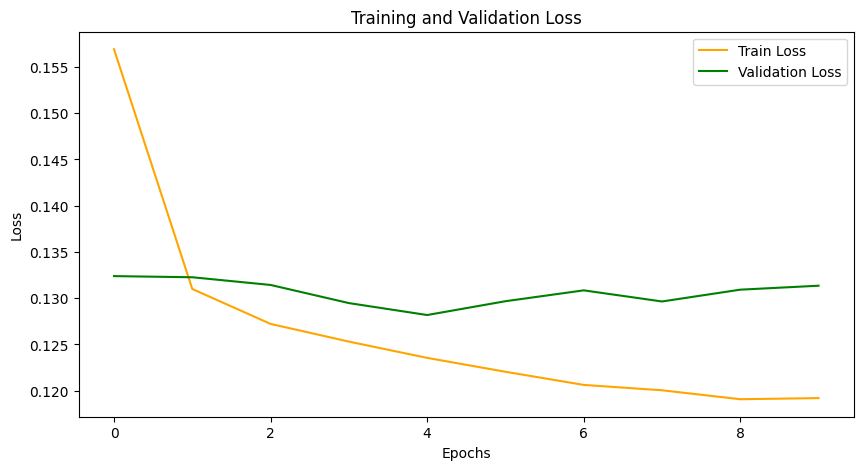

In [40]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()